In [120]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
from numpy.random import default_rng
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',100) 
pd.set_option('max_rows',500) 
File_Path = 'AllData.csv'
sns.set_style('darkgrid')

In [121]:
data = pd.read_csv(File_Path)

# 三种职业薪水的基本情况及比较

## 1. 从收入中位数看，DA收入明显低于DE，DS；<br>2. DE，DS收入虽有差距，但差距不大。

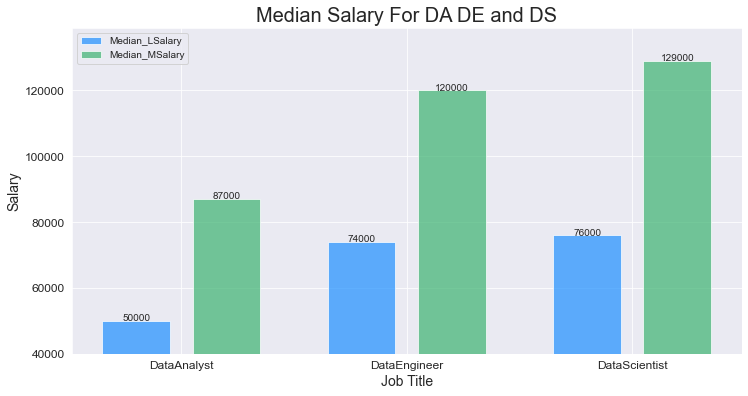

In [122]:
df = data[['Lo Salary', 'Hi Salary']].groupby(data['Job Title']).median()

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,1,1)
bar_width = 0.3
index = df.index
x = range(len(index))
y1 = df['Lo Salary']
y2 = df['Hi Salary']
bar1 = ax1.bar(x=[i-0.2 for i in x], 
               height=y1, 
               width=bar_width, 
               alpha=0.7, 
               color='dodgerblue', 
               label='Median_LSalary')
bar2 = ax1.bar(x=[i+0.2 for i in x],
              height=y2,
              width=bar_width,
              alpha=0.7,
              color='mediumseagreen',
              label='Median_MSalary')
ax1.set_title('Median Salary For DA DE and DS', fontsize=20)
plt.xticks(x, index, fontsize=12)
plt.xlabel('Job Title',fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Salary',fontsize=14)
plt.ylim(df['Lo Salary'].min()-10000, df['Hi Salary'].max()+10000)
plt.legend()

for bar in bar1:
    value = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, value+8, str(int(value)), ha='center', size='medium')
for bar in bar2:
    value = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, value+8, str(int(value)), ha='center', size='medium')
plt.show()

# 公司规模和工作机会及工资收入的关系

## 1. 大公司（收入，雇员人数）提供了大部分的数据相关的工作；<br> 2. 意外地，不同规模的企业提供的数据相关工作的工资水平大体相当 。

In [123]:
df1 = data['BS_R'].value_counts()
df2 = data[['Lo Salary', 'Hi Salary']].groupby(data['BS_R']).median()
df2 = df2.reindex(index=['Large', 'Medium', 'Small', 'Micro', 'Other'])

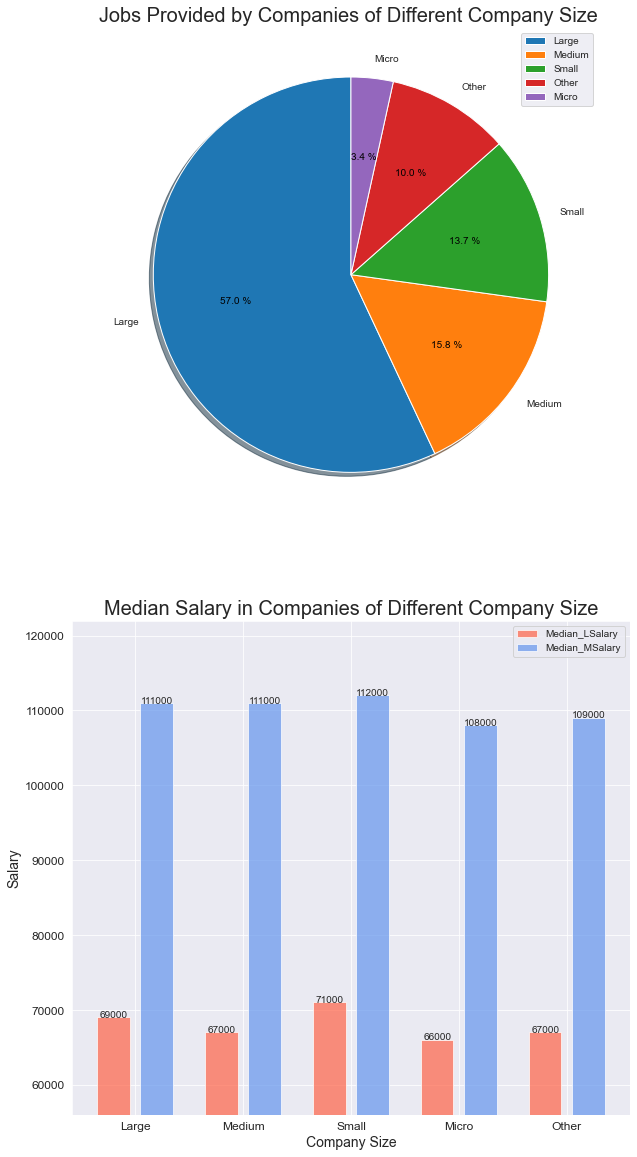

In [124]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(2,1,1)

v = df1.values
ax1.set_title('Jobs Provided by Companies of Different Company Size ', fontsize=20)
patches, l_text, p_text = plt.pie(v, 
                                  labels=df1.index, 
                                  autopct='%.1f %%',
                                  startangle=90,
                                  shadow=True)
for i in p_text:
    i.set_size(10)
    i.set_color('k')

plt.legend()
plt.plot()

ax2 = fig.add_subplot(2,1,2)
bar_width = 0.3
index = df2.index
x = range(len(index))
y1 = df2['Lo Salary']
y2 = df2['Hi Salary']
bar1 = ax2.bar(x=[i-0.2 for i in x], 
               height=y1, 
               width=bar_width, 
               alpha=0.7, 
               color='tomato', 
               label='Median_LSalary')
bar2 = ax2.bar(x=[i+0.2 for i in x],
              height=y2,
              width=bar_width,
              alpha=0.7,
              color='cornflowerblue',
              label='Median_MSalary')
ax2.set_title('Median Salary in Companies of Different Company Size', fontsize=20)
plt.xticks(x, index, fontsize=12)
plt.xlabel('Company Size',fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Salary',fontsize=14)
plt.ylim(df2['Lo Salary'].min()-10000, df2['Hi Salary'].max()+10000)
plt.legend()

for bar in bar1:
    value = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, value+8, str(int(value)), ha='center', size='medium')
for bar in bar2:
    value = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, value+8, str(int(value)), ha='center', size='medium')
    
plt.show()

# Job Description中一些关于语言,常用软件,学历的简单统计

## 1. 常用的最5种语言 R, Sql, Python, Java, C++ <br> 2. 最常用的5个软件Excel, Spark, Tableau , Hadoop, Sas <br> 3. DS 对PhD需求量大, 远超 DA, DE; DA, DE对学历的要求基本一致 

In [125]:
language = {'Python':0, 'R':0, 'SQL':0, 'Java':0, 'C++':0 , 'c#':0}
for key in language.keys():
    if key == 'C++':
        key = 'C\+\+'
    value = len(data[data['Job Description'].str.contains(key, regex=True, flags=re.IGNORECASE)])
    if key == 'C\+\+':
        key = 'C++'
    language[key] = value

df1 = pd.DataFrame(language, index=['counts']).T
df1.sort_values('counts', inplace=True, ascending=False)
df1_ = df1.iloc[0:5]

In [126]:
software = {'Excel':0, 'Word':0, 'Powerpoint':0, 'Tableau':0, 'PowerBI':0, 'Hadoop':0, 'Spark':0, 'Jira':0, 'Sas':0, 'Spss':0,'Stata':0}
for key in software.keys():
    if key == 'PowerBI':
        key = 'Power\s*BI'
    value = len(data[data['Job Description'].str.contains(key, regex=True, flags=re.IGNORECASE)])
    if key == 'Power\s*BI':
        key = 'PowerBI'
    software[key] = value

df2 = pd.DataFrame(software, index=['counts']).T
df2.sort_values('counts', inplace=True, ascending=False)
df2_ = df2.iloc[0:5]

In [127]:
degree = ['Bachelor', 'Master', 'PhD']
jobs = ['DataAnalyst','DataEngineer','DataScientist']
df_list= []
i = 0
for job in jobs:
    for d in degree:
        value = len(data[(data['Job Title'] == job) & (data['Job Description'].str.contains(d, regex=True, flags=re.IGNORECASE))])
        df3 = pd.DataFrame({'Counts': value, 'Degree': d, 'Job': job}, index=[i]) 
        df_list.append(df3)
        i += 1

df3 = pd.concat(df_list)

In [128]:
def bar_plot(ax, df, colors, xlabel, ylabel, bwidth, lsize, tsize):
    y = list(df.counts)
    index = df.index
    x = range(len(index))
    bar_width = bwidth

    bar = ax.bar(x, 
                  y, 
                  width=bar_width, 
                  color=colors,
                  alpha=0.7)

    ax.set_xlabel(xlabel, fontsize=lsize)
    ax.set_xticks(x)
    ax.set_xticklabels(index, fontsize=tsize)
    ax.set_ylabel(ylabel, fontsize=lsize)

    for b in bar:
        v = b.get_height()
        x = b.get_x() + bar_width / 2
        ax.text(x, v+8, str(v), ha='center', size='medium')

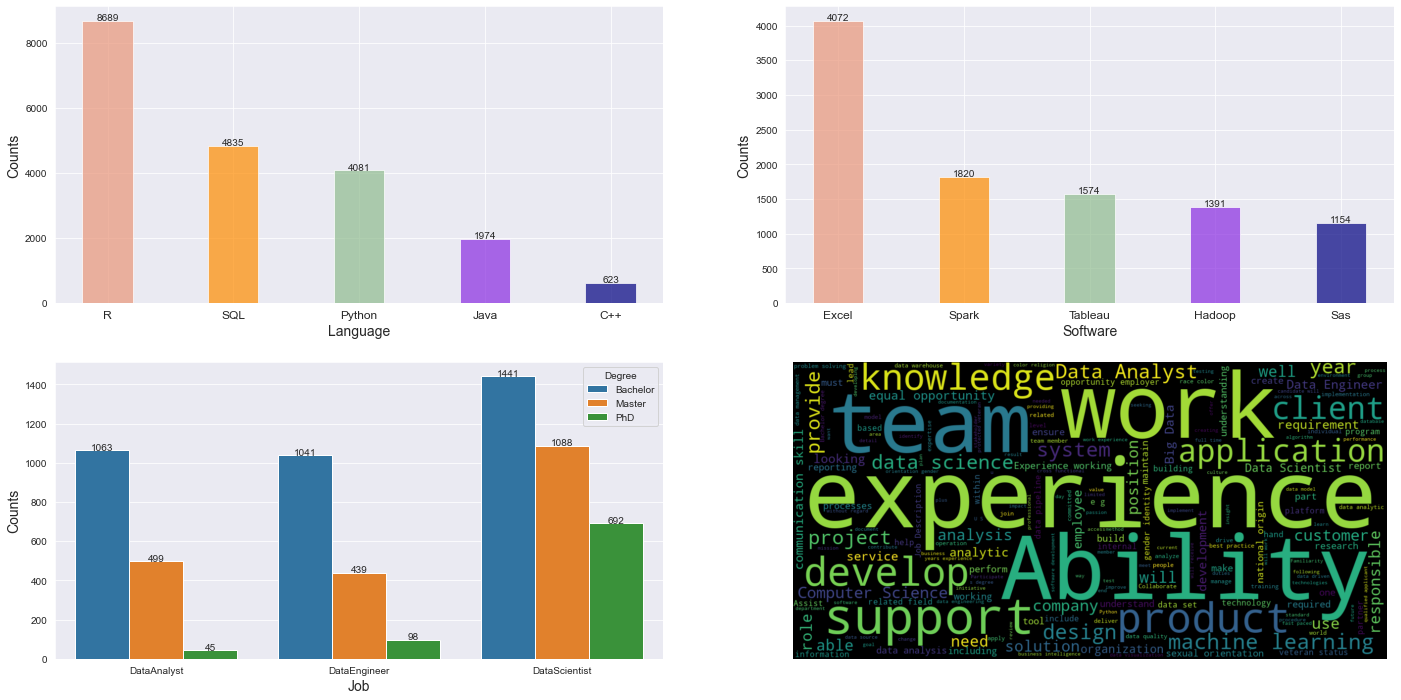

In [129]:
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(2,2,1)
colors=['darksalmon','darkorange','darkseagreen','blueviolet','navy']   
bar_plot(ax1, df1_, colors, 'Language', 'Counts', 0.4, 14, 12)

ax2 = fig.add_subplot(2,2,2)
bar_plot(ax2, df2_, colors, 'Software', 'Counts', 0.4, 14, 12)

ax3 = fig.add_subplot(2,2,3)
sns.barplot(x='Job', y="Counts", hue="Degree", data=df3)
ax3.set_xlabel('Job', fontsize=14)
ax3.set_ylabel('Counts', fontsize=14)


# from stack overflow
def show_on_single_plot(ax):        
    for p in ax.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height()
        value = int(p.get_height())
        ax.text(_x, _y, value, ha="center")
show_on_single_plot(ax3)

ax4 = fig.add_subplot(2,2,4)
f_name = 'JD.txt'
with open(f_name, 'w+') as f:
    for index, row in data.iterrows():
        f.write(str(row['Job Description']))
    f.seek(0, 0)    
    text = f.read()
    wordcloud = WordCloud(width=1200,height=600).generate(text)
    ax4.imshow(wordcloud, interpolation='bilinear')
    ax4.axis("off")

plt.show()

# 工作机会和工资收入与地域的关系

## 1. 工作机会最多的几个州是：TX，CA， NY， IL， PA， AZ <br> 2. 这几个州中，CA工资水平可能是最高的

In [130]:
df1 = data['State'].value_counts()
other = df1[9:].values.sum()
df1 = df1[:9]
df1['other'] = 395

# TX, CA, NY, IL, PA, AZ
State = ['TX', 'CA', 'NY', 'IL', 'PA', 'AZ']
data_list = []
for s in State:
    data_list.append(data[data['State'] == s]['Expected Salary'])

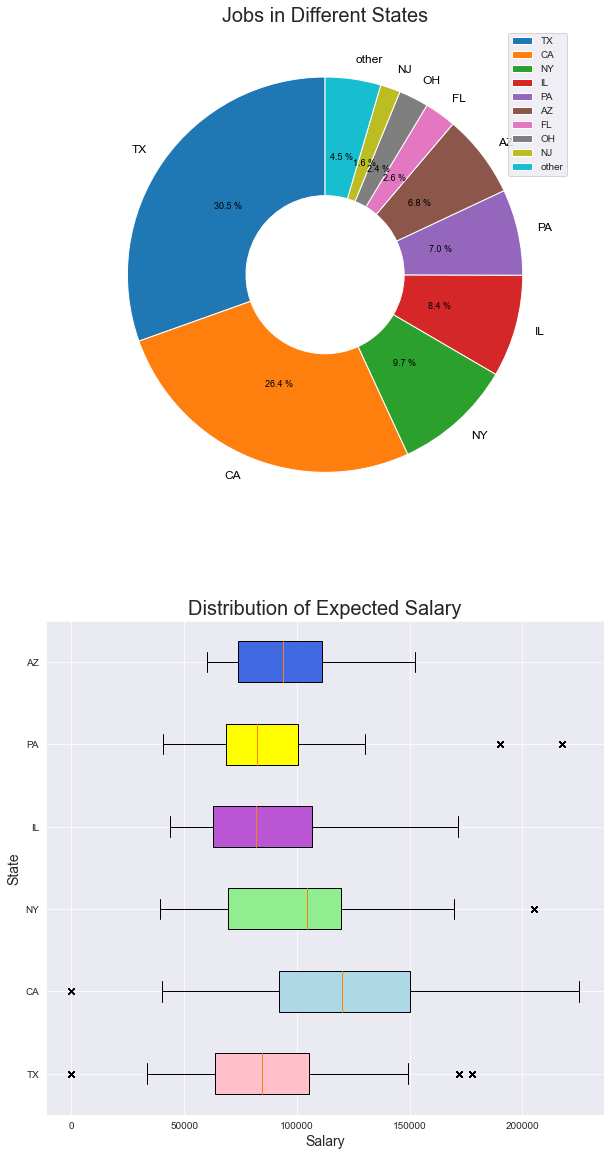

In [131]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(2,1,1)

v = df1.values
ax1.set_title('Jobs in Different States', fontsize=20)
patches, l_text, p_text = ax1.pie(v, 
                                  labels=df1.index, 
                                  autopct='%.1f %%',
                                  startangle=90,
                                  wedgeprops=dict(width=0.6,edgecolor='w'))
for i in p_text:
    i.set_size(9)
    i.set_color('k')

for i in l_text:
    i.set_size(12)
    i.set_color('k')

ax1.legend()

ax2 = fig.add_subplot(2,1,2)
boxplot = ax2.boxplot(data_list,
                      labels=State,
                      whis=1.5,
                      flierprops={'marker':'x', 'color':'k'},
                      patch_artist=True,
                      vert=False)
ax2.set_title('Distribution of Expected Salary',fontsize=20)
ax2.set_xlabel('Salary', fontsize=14)
ax2.set_ylabel('State', fontsize=14)

colors = ['pink', 'lightblue', 'lightgreen', 'mediumorchid', 'yellow', 'royalblue']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

# 最后是一张简陋的工作机会地域（州）分布图

In [132]:
df = data['State'].value_counts()
df.drop('United Kingdom', inplace=True)
df = df1.reset_index(name='Counts')
df.rename(columns={"index": "States", "Counts": "Jobs"}, inplace=True)

In [133]:
import plotly.express as px
fig = px.choropleth(df, locations=df.States, locationmode="USA-states", 
                    color='Jobs', color_continuous_scale="Viridis",
                    range_color=(0, 2650), scope="usa")
fig.show()